In [ ]:
''' # 클래스 5 
옥외누수, 옥내누수, 기계_전기음, 환경음, 정상음
out, in, noise, other, normal 
''';

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/user/a_python_example_50/신경회로특론/project_1'

In [3]:
PATH =  '/home/user/a_python_example_50/신경회로특론/project_1'

data = pd.read_csv(os.path.join(PATH, '1.누수감지데이터-통합(leaks-all).csv'), encoding='utf-8')

In [4]:
pd_data = pd.DataFrame(data)

In [5]:
pd_data.head()

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-2711010100,S-0359369084021423,20200903,90,695,out,0,3,0,3,...,280,741,280,469,270,813,280,644,270,250
1,S-2711010100,S-0359369084021423,20200907,90,261,out,0,5,4,4,...,280,629,280,212,270,234,270,355,270,223
2,S-2711010100,S-0359369084044425,20200704,90,747,out,0,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,S-2711010100,S-0359369084044425,20200705,90,747,out,0,6,6,6,...,410,758,410,857,420,650,410,907,410,631
4,S-2711010100,S-0359369084044425,20200706,90,825,out,0,6,6,6,...,410,771,410,622,410,894,420,775,410,918


In [6]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78204 entries, 0 to 78203
Columns: 539 entries, site to MAX19
dtypes: int64(536), object(3)
memory usage: 321.6+ MB


In [7]:
pd_data = pd_data.drop(['site', 'sid', 'ldate', 'lrate', 'llevel'], axis=1)

In [8]:
pd_data.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,out,0,3,0,3,3,3,3,5,5,...,280,741,280,469,270,813,280,644,270,250
1,out,0,5,4,4,3,4,4,6,4,...,280,629,280,212,270,234,270,355,270,223
2,out,0,6,6,6,6,6,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,out,0,6,6,6,6,6,6,8,8,...,410,758,410,857,420,650,410,907,410,631
4,out,0,6,6,6,6,6,6,6,6,...,410,771,410,622,410,894,420,775,410,918


In [9]:
# data_type별 데이터프레임 작성 

out_data = pd_data[pd_data['leaktype']=='out']
in_data = pd_data[pd_data['leaktype']=='in']
noise_data = pd_data[pd_data['leaktype']=='noise']
other_data = pd_data[pd_data['leaktype']=='other']
normal_data = pd_data[pd_data['leaktype']=='normal']

In [10]:
data_set = [out_data, in_data, noise_data, other_data, normal_data]

In [11]:
for i in data_set:
    print(i.shape)

(21923, 534)
(16591, 534)
(6287, 534)
(8775, 534)
(24628, 534)


In [12]:
pd_data['leaktype'].value_counts()

normal    24628
out       21923
in        16591
other      8775
noise      6287
Name: leaktype, dtype: int64

In [13]:
import plotly.graph_objs as go
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 로깅 off
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [14]:
out_data.head()

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,out,0,3,0,3,3,3,3,5,5,...,280,741,280,469,270,813,280,644,270,250
1,out,0,5,4,4,3,4,4,6,4,...,280,629,280,212,270,234,270,355,270,223
2,out,0,6,6,6,6,6,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,out,0,6,6,6,6,6,6,8,8,...,410,758,410,857,420,650,410,907,410,631
4,out,0,6,6,6,6,6,6,6,6,...,410,771,410,622,410,894,420,775,410,918


data_set_name = ['out_data', 'in_data', 'noise_data', 'other_data', 'normal_data']

for index, i in enumerate(data_set):
    feature = i.columns[1:]
    print(data_set_name[index])
        
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=feature,
            y=i[feature],
            name=data_set_name[index]
        )
    )
    fig.show()

In [15]:
# 소인수분해 
def factorization(x): 
    d = 2 
    while d <= x: 
        if x % d == 0: 
            print(d) 
            x = x / d 
        else: 
            d = d + 1

In [16]:
factorization(533)

13
41


In [17]:
gr_mu = pd_data.groupby('leaktype').mean().iloc[:, :]
gr_mu

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
leaktype,,,,,,,,,,,,,,,,,,,,,
in,0.0,6.506118,6.734073,7.149659,7.999337,8.874390,14.131818,8.641673,9.171298,9.938461,...,577.537822,507.115243,573.488638,507.076306,571.116268,507.468869,572.463986,507.027425,573.509734,506.964378
noise,0.0,4.490218,5.052330,5.644664,6.267695,6.602195,30.818992,7.352155,7.749165,8.579450,...,351.431525,589.669159,353.100048,591.773660,351.107046,589.430094,350.270399,592.897725,349.799586,587.605694
normal,0.0,4.264902,4.434181,4.629365,4.708503,4.817647,5.456797,4.925816,5.179430,5.576864,...,433.523632,163.314033,428.017703,162.912660,428.802582,161.144713,448.411158,162.961791,438.012019,159.847978
other,0.0,5.351681,5.761937,6.296752,6.354416,6.577208,13.128547,7.450940,7.896752,9.375157,...,556.617664,527.453447,552.667806,523.429060,563.097436,525.265071,560.455840,526.025641,559.381197,522.852080
out,0.0,5.714318,6.013319,6.373535,6.853761,7.376591,8.590385,8.069698,8.778406,10.258861,...,565.672125,528.959449,559.498700,529.292113,559.768736,529.614286,558.628381,529.832870,565.282124,526.601241


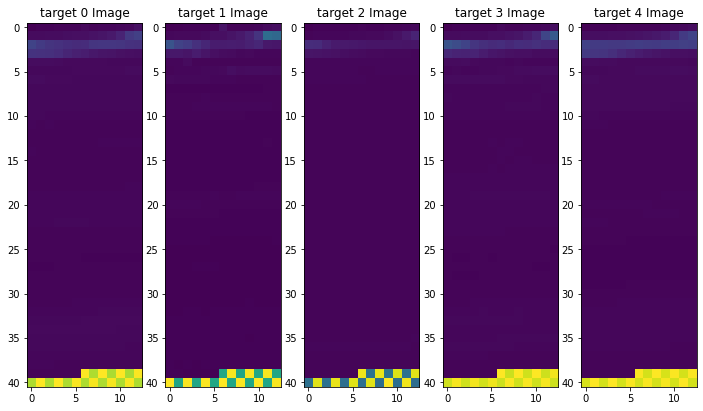

In [18]:
f, a = plt.subplots(1, 5, figsize = (12, 8))
for i in range(5):
    a[i].set_title(f'target {i} Image')
    a[i].imshow(np.array(gr_mu.iloc[i]).reshape(41, 13))

In [19]:
X = pd_data.iloc[:, 1:]
y = pd_data.iloc[:, :1]

In [20]:
X.shape

(78204, 533)

In [21]:
for index, i in enumerate(y.values):
    if i == 'out':
        i = 0
        #print('out 시작')
        y.values[index] = i
    elif i == 'in':
        i = 1
        #print('out 시작')
        y.values[index] = i
    elif i == 'noise':
        i = 2
        #print('out 시작')
        y.values[index] = i
    elif i == 'other':
        i = 3
        #print('out 시작')
        y.values[index] = i
    elif i == 'normal':
        i = 4
        #print('out 시작')
        y.values[index] = i
    else:
        print('error', i, index)

In [22]:
#scaleing
from sklearn.preprocessing import RobustScaler
sc= RobustScaler()
X = sc.fit_transform(X)
# y = sc.fit_transform(y)

X = np.array(X).reshape(-1, 41, 13, 1)
y = np.array(y['leaktype'])

In [23]:
X.shape

(78204, 41, 13, 1)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn.functional as F 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))
y_train=np.vstack(y_train).astype(np.float)
y_test=np.vstack(y_test).astype(np.float)

######################## train ########################
X_train = torch.tensor(X_train, dtype=torch.float32).to("cuda:0")
y_train = torch.tensor(y_train, dtype=torch.float32).to("cuda:0")

Data_set_train = TensorDataset(X_train, y_train)

######################## test #########################
X_test = torch.tensor(X_test, dtype=torch.float32).to("cuda:0")
y_test = torch.tensor(y_test, dtype=torch.float32).to("cuda:0")

Data_set_test = TensorDataset(X_test, y_test)

/tmp/ipykernel_1123301/3017868821.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train=np.vstack(y_train).astype(np.float)
/tmp/ipykernel_1123301/3017868821.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test=np.vstack(y_test).astype(np.float)


In [26]:
NUM_TRAIN = 60000  ## X * 0.8 = 62563 
NUM_TEST = 15641 ## x * 0.2 = 15641


loader_train = DataLoader(Data_set_train, batch_size=64, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN))) # total 61563 num


loader_val = DataLoader(Data_set_train, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 62563)))  # total 2563 num


loader_test = DataLoader(Data_set_test, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TEST)))  # total 15641 num


In [27]:
for a, b in Data_set_train:
    print(a.size())
    break

torch.Size([1, 41, 13])


In [28]:
for a, b in Data_set_test:
    print(a.size())
    break

torch.Size([1, 41, 13])


In [29]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [30]:
import torch.nn.functional as F 

In [31]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

In [32]:
def random_weight(shape):
    """
    Create random Tensors for weights; setting requires_grad=True means that we
    want to compute gradients for these Tensors during the backward pass.
    We use Kaiming normalization: sqrt(2 / fan_in)
    """
    if len(shape) == 2:  # FC weight
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) # conv weight [out_channel, in_channel, kH, kW]
    # randn is standard normal distribution generator. 
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# create a weight of shape [3 x 5]
# you should see the type `torch.cuda.FloatTensor` if you use GPU. 
# Otherwise it should be `torch.FloatTensor`
random_weight((3, 5))

tensor([[ 0.9806,  0.1681, -1.4702, -0.3143,  0.4914],
        [-1.2082,  1.2476, -0.2314, -0.9397, -0.2885],
        [ 0.3207, -0.3391, -0.1995, -0.0598,  1.7417]], device='cuda:0',
       requires_grad=True)

In [33]:
class Flatten(nn.Module):
    def forward(self, x):
#         print(x.size())
        return flatten(x)

In [34]:
def check_accuracy_part34(loader, model):
    if loader == loader_val:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            
            y = y.squeeze()
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [35]:
def train_part34(model, optimizer, epochs=1):
    num_correct = 0
    
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)

            
            y = y.squeeze() # [64,] not [64,1] 

            loss = F.cross_entropy(scores, y)  # cross_entropy 사용시에는 항상 확률분포로 들어가야함, .float()으로 

            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                print()

In [36]:
model = None
optimizer = None


# channel
ch_1, ch_2, ch_3, ch_4, ch_5 = 32, 128, 256, 256, 128

# hidden
h_1, h_2 = 64, 64

# num_classese
num_classes = 5

# learning Rate
lr = 1e-2

input_ch = 1
drop_out = 0.2 

model = nn.Sequential(
    nn.Conv2d(input_ch, ch_1, 2, padding=1), # 43 * 15
    nn.ReLU(inplace=True), ## 1
    nn.Dropout2d(p=drop_out),
    nn.BatchNorm2d(ch_1),
    
    nn.Conv2d(ch_1, ch_2, 1, padding=1), # 44 * 16
    nn.ReLU(inplace=True), ## 2
    nn.Dropout2d(p=drop_out),
    nn.BatchNorm2d(ch_2),
    
    nn.Conv2d(ch_2, ch_3, 4, padding=1), # 46 * 18
    nn.ReLU(inplace=True), ## 3
    nn.Dropout2d(p=drop_out),
    
    nn.Conv2d(ch_3, ch_4, 3, padding=1), # 45 x 17
    nn.ReLU(inplace=True),
    nn.Dropout2d(p=drop_out),
    
    nn.Conv2d(ch_4, ch_5, 3, padding=1), #45 x 17
    nn.ReLU(inplace=True),
    
 
    
    Flatten(),  ## Full-connection 
    nn.Linear(ch_5*43*15, h_1),        # 43 * 15
    nn.ReLU(inplace=True),
    
    
    nn.Linear(h_1, h_2),
    nn.ReLU(inplace=True),

    nn.Linear(h_2, num_classes)  #  5 * 64 
    #nn.Softmax(inplace=True)
)


optimizer = optim.Adam(model.parameters())


train_part34(model, optimizer, epochs=8)

Iteration 0, loss = 1.5837
Checking accuracy on validation set
Got 1082 / 2563 correct (42.22)

Iteration 100, loss = 1.0406
Checking accuracy on validation set
Got 1436 / 2563 correct (56.03)

Iteration 200, loss = 1.1539
Checking accuracy on validation set
Got 1444 / 2563 correct (56.34)

Iteration 300, loss = 1.0378
Checking accuracy on validation set
Got 1555 / 2563 correct (60.67)

Iteration 400, loss = 0.7246
Checking accuracy on validation set
Got 1591 / 2563 correct (62.08)

Iteration 500, loss = 0.9816
Checking accuracy on validation set
Got 1584 / 2563 correct (61.80)

Iteration 600, loss = 0.9447
Checking accuracy on validation set
Got 1650 / 2563 correct (64.38)

Iteration 700, loss = 0.8012
Checking accuracy on validation set
Got 1691 / 2563 correct (65.98)

Iteration 800, loss = 0.7946
Checking accuracy on validation set
Got 1727 / 2563 correct (67.38)

Iteration 900, loss = 0.7894
Checking accuracy on validation set
Got 1702 / 2563 correct (66.41)

Iteration 0, loss = 0.

In [37]:
best_model = model
check_accuracy_part34(loader_test, best_model)

Checking accuracy on test set
Got 14076 / 15641 correct (89.99)
